In [186]:
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
pd.options.display.max_rows = 4000
import pingouin as pg
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [50]:
#prelimanary load of test data

fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

data = pd.read_excel(fd,sheet_name='Raw')

In [ ]:
#data = data.rename(columns={'Unnamed: 0': 'month','Unnamed: 1':'year','Unnamed: 2':'unemprate','Unnamed: 3': 's&p500','Unnamed: 4':'pmi','Unnamed: 5':'pmi1'})
data = data.drop([23,24])
data

In [56]:

model = LinearRegression()
x = data[['Unemployment rate change','S&P500change']]
y = data['PMI1change']
model = sm.OLS(y.astype(float),x.astype(float)).fit()
predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             PMI1change   R-squared (uncentered):                   0.202
Model:                            OLS   Adj. R-squared (uncentered):              0.118
Method:                 Least Squares   F-statistic:                              2.406
Date:                Wed, 01 Apr 2020   Prob (F-statistic):                       0.117
Time:                        01:48:56   Log-Likelihood:                         -48.935
No. Observations:                  21   AIC:                                      101.9
Df Residuals:                      19   BIC:                                      104.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Unemployment rate change     0.0883      0.172      0.512      0.614      -0.273       0.449
S&P500change                -0.2836      0.135     -2.096      0.050      -0.567      -0.000
==============================================================================
Omnibus:                        1.405   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.495   Jarque-Bera (JB):                0.978
Skew:                          -0.516   Prob(JB):                        0.613
Kurtosis:                       2.767   Cond. No.                         1.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import pingouin as pg
pg.corr(x=data['unemprate'].astype(float), y=data['pmi1'].astype(float))

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,21,0.079,"[-0.37, 0.49]",0.006,-0.104,0.735021,0.285,0.063


In [874]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\finaladspend.xlsx")

adspend = pd.read_excel(fd,sheet_name=0)

In [875]:
adspend.columns = adspend.iloc[2,:]
adspend = adspend.drop([0,1,2,26,27,28,29,30,31])
adspend = adspend.T
adspend.columns = adspend.iloc[0,:]
adspend['date'] = adspend.index
#adspend = adspend.rename(columns={'data':'date'})
s = pd.Series (range(0,124))
adspend = adspend.set_index(s)
adspend = adspend.drop([0,1,123])
adspend = adspend.fillna(0)
adspend['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()
adspend['val_EMA'] = adspend.iloc[:,22].ewm(span=40,adjust=False).mean()
#adspend['Network TV'].ndim
#adspend['Network TV'].shape

In [193]:
adspendchange = pd.DataFrame()

for columns in adspend.columns:
    if columns != 'date':
        adspendchange[columns] =adspend[columns].pct_change()
        adspendchange = adspendchange.fillna(0)
    elif columns == 'date':
        adspendchange['date'] = adspend['date']
        
s = pd.Series(range(0,121))
adspendchange = adspendchange.set_index(s)  
adspendchange['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()
adspendchange = adspendchange.set_index('mmyy')

In [311]:
#scaller = StandardScaler()
scaler = MinMaxScaler ()
adspendscale = adspend


columns = adspend.columns
columns = columns.drop('date')
test = []
adspendscale[columns] = scaler.fit_transform(adspend[columns])
adspendscale['date']  = pd.date_range('2010-1-1','2020-1-30', freq='MS').strftime("%Y-%b").tolist()
adspendscale = adspendscale.set_index('date')        



Text(0, 0.5, 'GRAND TOTAL')

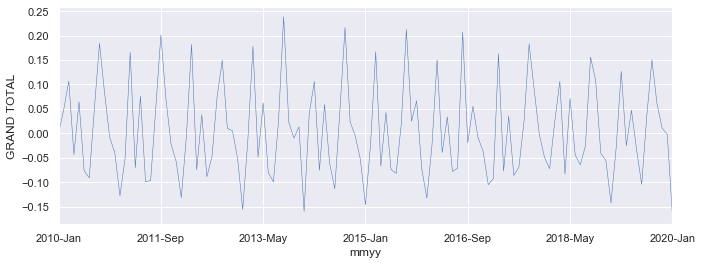

In [308]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendchange['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')

Text(0, 0.5, 'GRAND TOTAL')

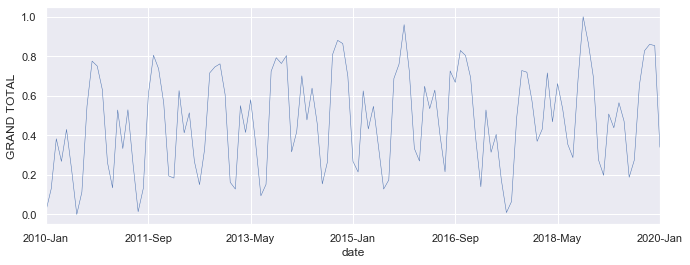

In [312]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendscale['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')

In [361]:
for i in range (0,adspendscale.shape[0]-2):
    adspendscale.loc[adspendscale.index[i+2],'SMA_3'] = np.round(((adspendscale.iloc[i,22]+adspendscale.iloc[i+1,22]+adspendscale.iloc[i+2,22])/3),1)
    

In [365]:
adspendscale['pandas_SMA_3'] = adspendscale.iloc[:,22].rolling(window=3).mean()
adspendscale.iloc[1,24] = adspendscale.iloc[1,22]

In [384]:
adspendscale['pandas_EMA'] = adspendscale.iloc[:,22].ewm(span=40,adjust=False).mean()

Text(0, 0.5, 'pandas_EMA')

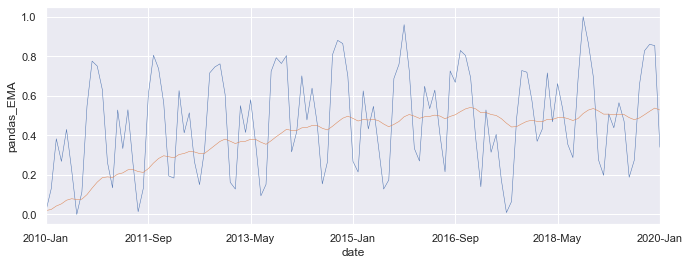

In [387]:
sns.set(rc={'figure.figsize':(11, 4)})
adspendscale['GRAND TOTAL'].plot(linewidth=.5).set_ylabel('GRAND TOTAL')
adspendscale['pandas_EMA'].plot(linewidth=.5).set_ylabel('pandas_EMA')

In [899]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

unemp = pd.read_excel(fd,sheet_name=2)

In [901]:
unemp = unemp.drop(['Unnamed: 3',
       'https://data.bls.gov/timeseries/LNS14000000'],axis=1)
unemp = unemp.iloc[24:145,:]
unemp['mmyy']  = pd.date_range('2010-1-1','2020-1-31', freq='MS').strftime("%Y-%b").tolist()
unemp = unemp.drop(['Month','year'],axis=1)

,Month,year,value
0,Jan,2008,5.0
1,Feb,2008,4.9
2,Mar,2008,5.1
3,Apr,2008,5.0
4,May,2008,5.4
5,Jun,2008,5.6
6,Jul,2008,5.8
7,Aug,2008,6.1
8,Sep,2008,6.1
9,Oct,2008,6.5


In [318]:
unempchange = pd.DataFrame()
unempchange['ratechange'] = unemp['value'].pct_change()
unempchange = unempchange.fillna(0)
unempchange['date']  = pd.date_range('2010-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unempchange = unempchange.set_index('date')

In [319]:
unemp.columns

Index(['Month', 'year', 'value'], dtype='object')

In [320]:
scaler = MinMaxScaler ()
unempscale = unemp
columns = unemp.columns
columns = columns.drop(['Month','year'])
unempscale[columns] = scaler.fit_transform(unempscale[columns])
unempscale['date']  = pd.date_range('2010-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unempscale = unempscale.set_index('date')
        


Text(0, 0.5, 'ratechange')

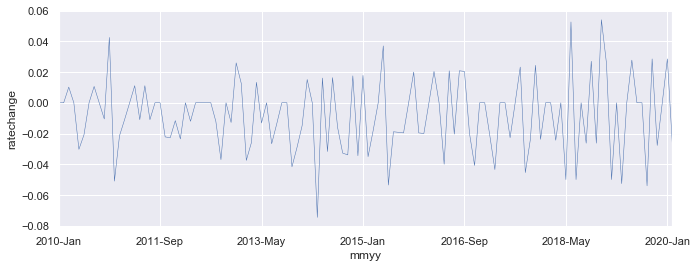

In [120]:
sns.set(rc={'figure.figsize':(11, 4)})
unempchange['ratechange'].plot(linewidth=.5).set_ylabel('ratechange')

Text(0, 0.5, 'value')

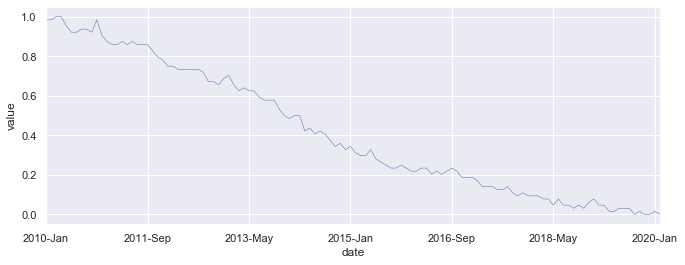

In [321]:
sns.set(rc={'figure.figsize':(11, 4)})
unempscale['value'].plot(linewidth=.5).set_ylabel('value')

In [275]:
import pingouin as pg
pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.226,"[-0.39, -0.05]",0.051,0.035,0.012608,2.459,0.709


In [276]:
import pingouin as pg
pg.corr(x=unempchange['ratechange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.097,"[-0.27, 0.08]",0.01,-0.007,0.287499,0.199,0.187


In [379]:
 pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.324,"[-0.48, -0.15]",0.105,0.09,0.000283,76.464,0.956


In [388]:
 pg.corr(x=unempscale['value'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.918,"[-0.94, -0.88]",0.843,0.84,1.154486e-49,1.267e+46,1.0


In [277]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp = pd.read_excel(fd,sheet_name=0)

In [278]:
snp = snp.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/'],axis=1)

In [280]:
snpchange = pd.DataFrame()
snpchange['indexchange'] = snp['Close'].pct_change()
snpchange = snpchange.fillna(0)
snpchange['date'] = snp['Date']
snpchange = snpchange.set_index('date')


In [281]:
snp.columns

Index(['Date', 'Month', 'year', 'Close'], dtype='object')

In [282]:
scaler = MinMaxScaler ()
snpscale = snp
columns = snp.columns
columns = columns.drop(['Date','Month','year'])
snpscale[columns] = scaler.fit_transform(snpscale[columns])
snpscale['date']  = pd.date_range('2010-1-1','2020-3-30', freq='MS').strftime("%Y-%b").tolist()
snpscale = snpscale.set_index('date')


Text(0, 0.5, 'indexratechange')

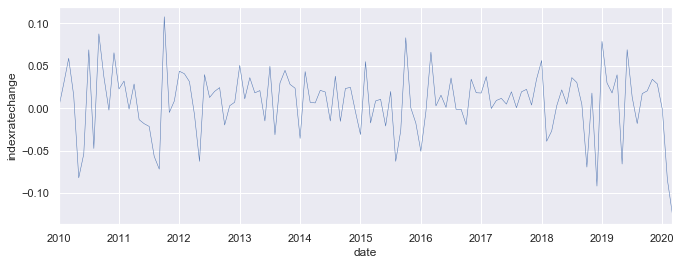

In [140]:
sns.set(rc={'figure.figsize':(11, 4)})
snpchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'SNPIndexClose')

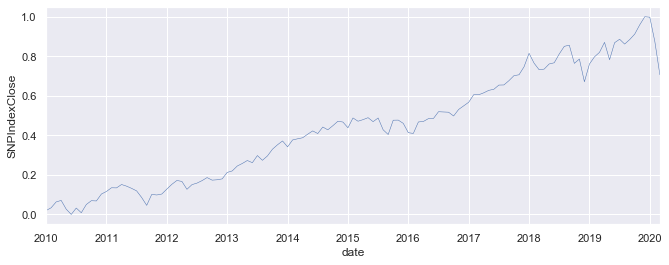

In [286]:
sns.set(rc={'figure.figsize':(11, 4)})
snpscale['Close'].plot(linewidth=.5).set_ylabel('SNPIndexClose')

In [142]:
import pingouin as pg
pg.corr(x=snpchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.045,"[-0.22, 0.13]",0.002,-0.015,0.626385,0.128,0.078


In [287]:
import pingouin as pg
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.206,"[0.03, 0.37]",0.043,0.026,0.023244,1.447,0.626


In [380]:
import pingouin as pg
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.299,"[0.13, 0.45]",0.09,0.074,0.000848,27.789,0.92


In [389]:
pg.corr(x=snpscale['Close'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,0.828,"[0.76, 0.88]",0.685,0.68,1.215464e-31,2.655e+28,1.0


In [288]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\phsi.xlsx")

phsi = pd.read_excel(fd,sheet_name=1)

In [289]:
phsi.columns

Index(['Date', 'Index', 'Month', 'Year', 'Item', 'Unnamed: 5'], dtype='object')

In [290]:
phsi = phsi.drop(['Item', 'Unnamed: 5'],axis=1)
phsi = phsi.drop([116,117])

In [292]:
phsichange = pd.DataFrame()
phsichange['indexchange'] = phsi['Index'].pct_change()
phsichange = phsichange.fillna(0)
phsichange['date'] = phsi['Date']
phsichange = phsichange.set_index('date')


In [293]:
scaler = MinMaxScaler ()
phsiscale = phsi
columns = phsiscale.columns
columns = columns.drop(['Date','Month','Year'])
phsiscale[columns] = scaler.fit_transform(phsiscale[columns])
phsiscale['date']  = pd.date_range('2010-7-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
phsiscale = phsiscale.set_index('date')

Text(0, 0.5, 'indexratechange')

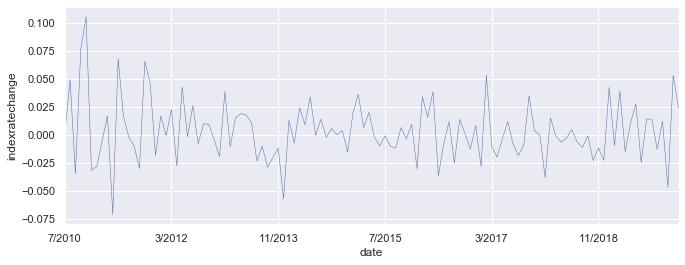

In [173]:
sns.set(rc={'figure.figsize':(11, 4)})
phsichange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'PhsiIndex')

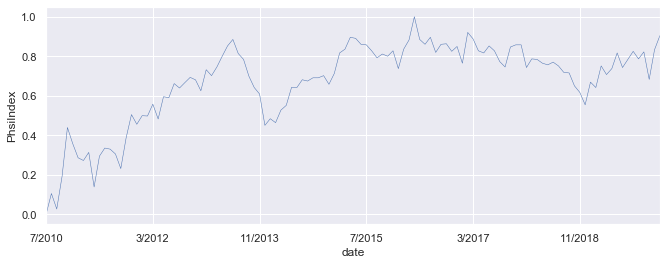

In [294]:
sns.set(rc={'figure.figsize':(11, 4)})
phsiscale['Index'].plot(linewidth=.5).set_ylabel('PhsiIndex')

In [174]:
pg.corr(x=phsichange['indexchange'].iloc[0:115], y=adspendchange['GRAND TOTAL'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,-0.002,"[-0.18, 0.18]",0.0,-0.018,0.983731,0.117,0.05


In [295]:
pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['GRAND TOTAL'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.108,"[-0.08, 0.29]",0.012,-0.006,0.252469,0.223,0.209


In [381]:
pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['pandas_SMA_3'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.163,"[-0.02, 0.34]",0.027,0.009,0.081164,0.523,0.417


In [390]:

pg.corr(x=phsiscale['Index'].iloc[0:115], y=adspendscale['pandas_EMA'].iloc[6:])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,115,0.849,"[0.79, 0.89]",0.72,0.715,4.862277e-33,6.071e+29,1.0


In [749]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\manufaturing index.xlsx")

manu = pd.read_excel(fd,sheet_name=0)
manu = manu.drop(['Item'],axis=1)
manu = manu.drop([146,147])
scaler = MinMaxScaler ()
columns = manu.columns
columns = columns.drop(['Date','Month','Year'])
manu['manuscale'] = scaler.fit_transform(manu[columns])
manu['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
manu = manu.set_index(manu['mmyy'])
manu = manu.drop(['Date','Month','Year'],axis=1)

In [300]:
manuchange = pd.DataFrame()
manuchange['indexchange'] = manu['Index'].pct_change()
manuchange = manuchange.set_index(manu['Date'])
manuchange = manuchange.fillna(0)


In [302]:
manu.columns

Index(['Date', 'Index', 'Month', 'Year'], dtype='object')

In [304]:
scaler = MinMaxScaler ()
manuscale = manu
columns = manuscale.columns
columns = columns.drop(['Date','Month','Year'])
manuscale[columns] = scaler.fit_transform(manuscale[columns])
manuscale['date'] = manu['Date']
manuscale = manuscale.set_index(manu['Date'])

Text(0, 0.5, 'indexratechange')

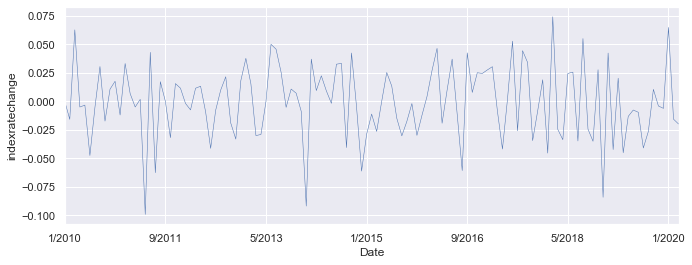

In [183]:
sns.set(rc={'figure.figsize':(11, 4)})
manuchange['indexchange'].plot(linewidth=.5).set_ylabel('indexratechange')

Text(0, 0.5, 'ManuIndex')

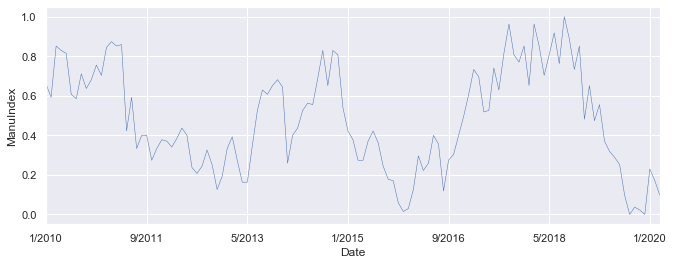

In [305]:
sns.set(rc={'figure.figsize':(11, 4)})
manuscale['Index'].plot(linewidth=.5).set_ylabel('ManuIndex')

In [185]:

pg.corr(x=manuchange['indexchange'].iloc[0:121], y=adspendchange['GRAND TOTAL'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.097,"[-0.27, 0.08]",0.009,-0.007,0.291557,0.197,0.184


In [306]:

pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['GRAND TOTAL'])


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.11,"[-0.28, 0.07]",0.012,-0.005,0.227802,0.233,0.227


In [382]:

pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['pandas_SMA_3'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.169,"[-0.34, 0.01]",0.028,0.012,0.064181,0.618,0.459


In [392]:
pg.corr(x=manuscale['Index'].iloc[0:121], y=adspendscale['pandas_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.231,"[-0.39, -0.06]",0.053,0.037,0.010692,2.842,0.728


In [ ]:
#list of database for regression 1. adspendscale 2. unempscale 3. snpscale 4. phsiscale

In [556]:
unempscale['mmyy'] = unempscale.index 
adspendscale['mmyy'] = adspendscale.index
phsiscale['mmyy'] = phsiscale.index
snpscale['mmyy'] = snpscale.index
adspendscalev1 = adspendscale[['pandas_EMA','mmyy']]


In [563]:
phsiscalev1 = phsiscale
a_row = pd.DataFrame([['2010-Jan',0,1,2010],['2010-Feb',0,2,2010],['2010-Mar',0,3,2010],['2010-Apr',0,4,2010],['2010-May',0,5,2010],['2010-Jun',0,6,2010]],columns=['mmyy','Index','Month','Year'])
phsiscalev1 = pd.concat([a_row, phsiscale],ignore_index=True)
phsiscalev1 = phsiscalev1.drop(['Month','Year'],axis=1)
phsiscalev1 = phsiscalev1.rename(columns={"Index":"phsival"})

In [575]:
train = pd.merge(adspendscalev1,unempscale)
train = train.drop(['Month','year'],axis=1)
train = train.rename(columns={'value':'unempvalue'})
train = train.merge(phsiscalev1)
train = train.merge(snpscale)
train = train.drop(['Date','Month','year'],axis=1)
train = train.rename(columns={'Close':'snpval'})
train['const'] = 1
train['val_EMA'] = adspend['val_EMA']
adspendv1 = adspend[['GRAND TOTAL','mmyy','val_EMA']]
train = train.merge(adspendv1)
train

,pandas_EMA,mmyy,unempvalue,phsival,snpval
0,0.019680,2010-Jan,0.984375,0.000000,0.019618
1,0.025020,2010-Feb,0.984375,0.000000,0.033535
2,0.042468,2010-Mar,1.000000,0.000000,0.063053
3,0.053481,2010-Apr,1.000000,0.000000,0.070898
4,0.071852,2010-May,0.953125,0.000000,0.026681
5,0.079323,2010-Jun,0.921875,0.000000,0.000000
6,0.075454,2010-Jul,0.921875,0.000000,0.032222
7,0.077285,2010-Aug,0.937500,0.105796,0.008463
8,0.100217,2010-Sep,0.937500,0.027337,0.050221
9,0.133161,2010-Oct,0.921875,0.193002,0.069339


In [935]:
train.columns

Index(['pandas_EMA', 'mmyy', 'unempvalue', 'phsival', 'snpval', 'const',
       'snpval1', 'unempvalue1', 'phsival1', 'value', 'GRAND TOTAL',
       'val_EMA'],
      dtype='object')

In [964]:
pg.corr(x=train['unempvalue'], y=train['val_EMA'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.918,"[-0.94, -0.88]",0.843,0.84,1.154486e-49,1.267e+46,1.0


In [963]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#model = LinearRegression()
x = train[['const','unempvalue']]
y = train['pandas_EMA']
model = sm.OLS(y,x).fit()
#predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pandas_EMA   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     638.8
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.15e-49
Time:                        00:41:20   Log-Likelihood:                 181.03
No. Observations:                 121   AIC:                            -358.1
Df Residuals:                     119   BIC:                            -352.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.008     68.199      0.000       0.542       0.574
unempvalue    -0.3900      0.015    -25.274      0.000      -0.421      -0.359
==============================================================================
Omnibus:                       10.129   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.966
Skew:                          -0.737   Prob(JB):                      0.00416
Kurtosis:                       2.937   Cond. No.                         3.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [966]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
#model = LinearRegression()
x = train[['const','value']]
y = train['val_EMA']
model = sm.OLS(y,x).fit()
#predictions = model.predict(x)
model.summary()
#model.fit(x,y)
#model.score(x, y)
#coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
#print(coeff_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                val_EMA   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     638.8
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           1.15e-49
Time:                        00:57:04   Log-Likelihood:                -1674.9
No. Observations:                 121   AIC:                             3354.
Df Residuals:                     119   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.383e+07   7.22e+04    191.519      0.000    1.37e+07     1.4e+07
value      -2.794e+05   1.11e+04    -25.274      0.000   -3.01e+05   -2.58e+05
==============================================================================
Omnibus:                       10.129   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.966
Skew:                          -0.737   Prob(JB):                      0.00416
Kurtosis:                       2.937   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [872]:
adspendscale.to_csv('adspendscale.csv')

In [660]:
pg.corr(x=train['unempvalue1'], y=train['snpval1'])


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,121,-0.96,"[-0.97, -0.94]",0.922,0.921,8.731430e-68,7.982e+63,1.0


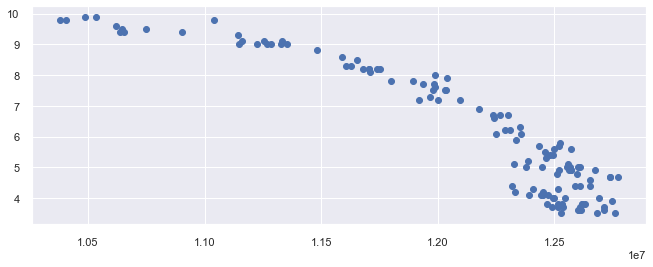

In [948]:
import matplotlib  
matplotlib.pyplot.scatter(train['val_EMA'],train['value'])

In [632]:
pred_val = model.fittedvalues.copy()
true_val = train['pandas_EMA'].values.copy()
residual = true_val - pred_val

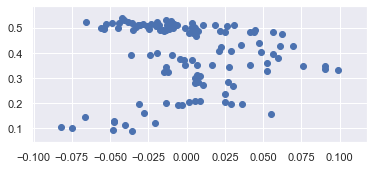

In [633]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

0.9872571978014918

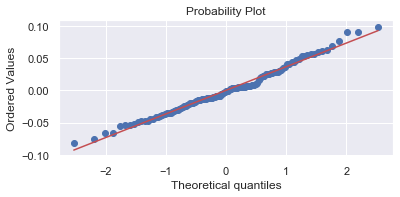

In [636]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2


In [638]:
import statsmodels.stats.api  
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, train[['unempvalue','phsival','snpval']])
pval, f_pval


(9.786348884292399e-11, 2.8097235607765093e-12)

In [640]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [945]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

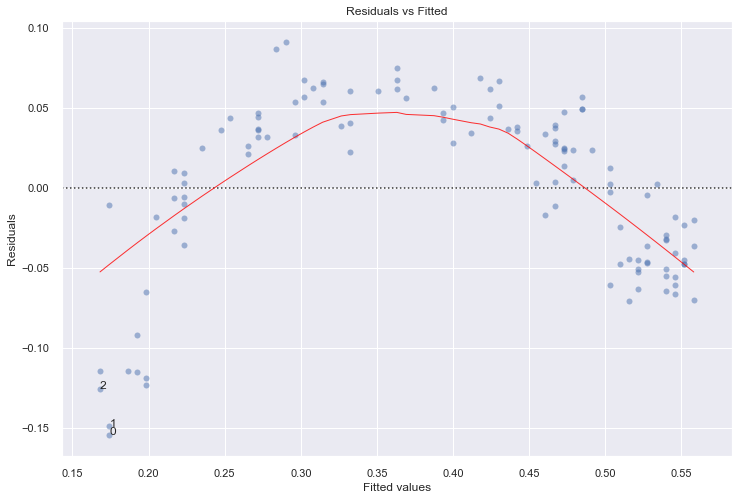

In [946]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'pandas_EMA', data=train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


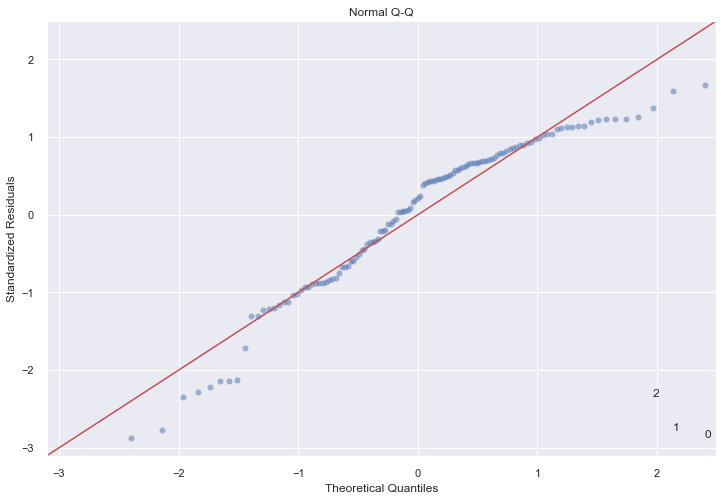

In [947]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [653]:
scaler = StandardScaler()

train['snpval1'] = scaler.fit_transform(train['snpval'].values.reshape(-1,1))


In [656]:
train['unempvalue1'] = scaler.fit_transform(train['unempvalue'].values.reshape(-1,1))
train['phsival1'] = scaler.fit_transform(train['phsival'].values.reshape(-1,1))

In [657]:

x = train[['const','unempvalue1','phsival1','snpval1']]
y = train['pandas_EMA']
model1 = sm.OLS(y,x).fit()
model1.summary()
#model.fit(x,y)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pandas_EMA   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     517.5
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.46e-67
Time:                        22:40:56   Log-Likelihood:                 229.84
No. Observations:                 121   AIC:                            -451.7
Df Residuals:                     117   BIC:                            -440.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3938      0.003    117.626      0.000       0.387       0.400
unempvalue1    -0.1164      0.016     -7.159      0.000      -0.149      -0.084
phsival1        0.0559      0.006      9.106      0.000       0.044       0.068
snpval1        -0.0361      0.014     -2.656      0.009      -0.063      -0.009
==============================================================================
Omnibus:                        2.772   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.618
Skew:                           0.359   Prob(JB):                        0.270
Kurtosis:                       2.942   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [692]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\cci.xlsx")

cci = pd.read_excel(fd,sheet_name=0)

In [693]:
cci['mmyy']  = pd.date_range('2008-1-1','2020-4-30', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = cci.columns
columns = columns.drop(['Date','mmyy'])
cci['cciscale'] = scaler.fit_transform(cci[columns])
cci = cci.set_index('mmyy')
cci = cci.drop('Date',axis=1)
cci = cci.iloc[0:146,:]

In [701]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\retailfood.xlsx")

retail = pd.read_excel(fd,sheet_name=1)

In [ ]:
retail['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = retail.columns
columns = columns.drop(['Period','mmyy'])
retail['retailscale'] = scaler.fit_transform(retail[columns])
retail = retail.set_index('mmyy')
retail = retail.drop('Period',axis=1)


In [ ]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\nonretail.xlsx")

nretail = pd.read_excel(fd,sheet_name=1)
 

In [705]:
nretail['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = nretail.columns
columns = columns.drop(['Period','mmyy'])
nretail['retailscale'] = scaler.fit_transform(nretail[columns])
nretail = nretail.set_index('mmyy')
nretail = nretail.drop('Period',axis=1)

In [707]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\health.xlsx")

health = pd.read_excel(fd,sheet_name=1)

In [709]:
health['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = health.columns
columns = columns.drop(['Period','mmyy'])
health['healthscale'] = scaler.fit_transform(health[columns])
health = health.set_index('mmyy')
health = health.drop('Period',axis=1)

In [716]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\electronics.xlsx")

electronics = pd.read_excel(fd,sheet_name=1)

In [717]:
electronics['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = electronics.columns
columns = columns.drop(['Period','mmyy'])
electronics['elecscale'] = scaler.fit_transform(electronics[columns])
electronics = electronics.set_index('mmyy')
electronics = electronics.drop('Period',axis=1)

In [719]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\retailsales\clothing.xlsx")

clothing = pd.read_excel(fd,sheet_name=1)

In [720]:
clothing['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
scaler = MinMaxScaler ()
columns = clothing.columns
columns = columns.drop(['Period','mmyy'])
clothing['clothscale'] = scaler.fit_transform(clothing[columns])
clothing = clothing.set_index('mmyy')
clothing = clothing.drop('Period',axis=1)

In [731]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

unemp1 = pd.read_excel(fd,sheet_name='Unemployment')
unemp1 = unemp1.drop(['Unnamed: 3',
       'https://data.bls.gov/timeseries/LNS14000000'],axis=1)
scaler = MinMaxScaler ()
columns = unemp1.columns
columns = columns.drop(['Month','year'])
unemp1['unempscale'] = scaler.fit_transform(unemp1[columns])
unemp1['mmyy']  = pd.date_range('2008-1-1','2020-2-29', freq='MS').strftime("%Y-%b").tolist()
unemp1 = unemp1.set_index('mmyy')
unemp1 = unemp1.drop(['Month','year'],axis=1)        


In [737]:
fd = (r"C:\Users\varunn\Documents\Confluence attachments\MarketingSci Regression analysis\Regressionanaly.xlsx")

snp = pd.read_excel(fd,sheet_name=0)
snp = snp.drop(['Unnamed: 4',
       'https://finance.yahoo.com/quote/%5EGSPC/history/'],axis=1)
scaler = MinMaxScaler ()
columns = snp.columns
columns = columns.drop(['Date','Month','year'])
snp['snpscale'] = scaler.fit_transform(snp[columns])
snp['mmyy']  = pd.date_range('2008-1-1','2020-3-30', freq='MS').strftime("%Y-%b").tolist()
snp = snp.set_index('mmyy')
snp = snp.drop(['Date','Month','year'],axis=1)
snp = snp.iloc[0:146,:]

Text(0, 0.5, 'value')

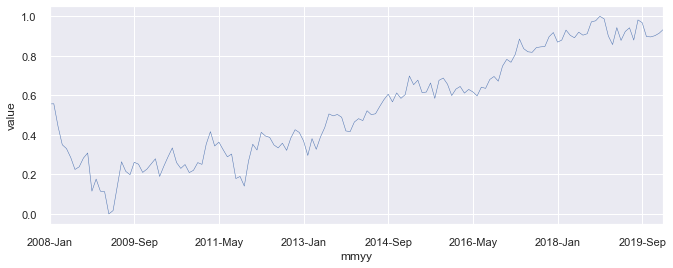

In [761]:
#cci ploit
sns.set(rc={'figure.figsize':(11, 4)})
cci['cciscale'].plot(linewidth=.5).set_ylabel('value')

Text(0, 0.5, 'value')

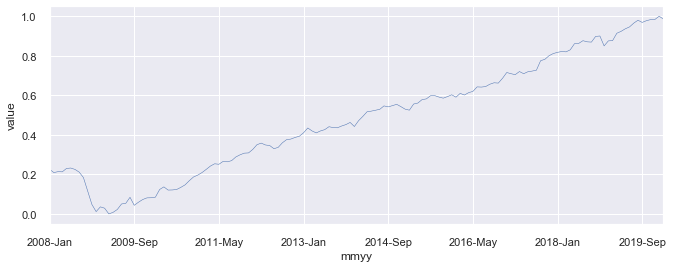

In [767]:
sns.set(rc={'figure.figsize':(11, 4)})
retail['retailscale'].plot(linewidth=.5).set_ylabel('value')

In [768]:
pg.corr(x=retail['retailscale'], y=cci['cciscale'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,0.958,"[0.94, 0.97]",0.918,0.917,5.441047e-80,1.116e+76,1.0


In [ ]:
#cci,retail,nretail,health,electronics,clothing,unemp1,snp,manu

In [797]:
cci['mmyy1'] = cci.index
retail['mmyy1'] = retail.index
nretail['mmyy1'] = nretail.index
health['mmyy1'] = health.index
electronics['mmyy1'] = electronics.index
clothing['mmyy1'] = clothing.index
unemp1['mmyy1'] = unemp1.index
snp['mmyy1'] = snp.index


In [815]:
train1= pd.merge(cci,retail)

In [812]:
train1 = train1.merge(nretail)

In [822]:
train1 = train1.merge(nretail)

In [824]:
train1 = train1.merge(health)

In [826]:
train1 = train1.merge(electronics)

In [828]:
train1 = train1.merge(clothing)

In [830]:
train1 = train1.merge(unemp1)

In [833]:
train1 = train1.merge(snp)

In [839]:
train1 = train1.merge(manu)
train1['cnst'] = 1

In [840]:
train1.columns

Index(['CCI value', 'cciscale', 'mmyy1', 'retailfoodservValue', 'retailscale',
       'nonstore', 'nretailscale', 'healthval', 'healthscale', 'electronicval',
       'elecscale', 'clothingval', 'clothscale', 'value', 'unempscale',
       'Close', 'snpscale', 'Index', 'manuscale'],
      dtype='object')

In [975]:
train1['snpchange'] = train1['Close']/1000


Text(0, 0.5, 'value')

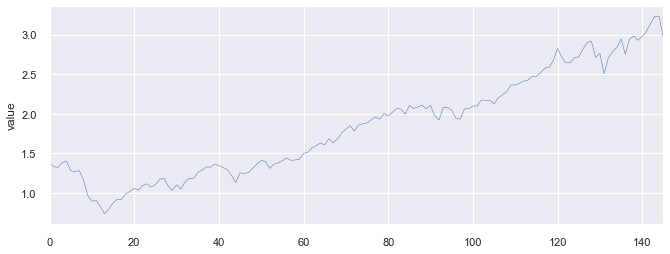

In [976]:
sns.set(rc={'figure.figsize':(11, 4)})
train1['snpchange'].plot(linewidth=.5).set_ylabel('value')

In [1049]:
pg.corr(x=train1['retailfoodservValue'], y=train1['value'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,-0.882,"[-0.91, -0.84]",0.778,0.775,6.235998e-49,2.834e+45,1.0


In [1050]:
x = train1[['cnst','value']]
y = train1['retailfoodservValue']
model = sm.OLS(y,x).fit()
model.summary()
#model.fit(x,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     retailfoodservValue   R-squared:                       0.778
Model:                             OLS   Adj. R-squared:                  0.777
Method:                  Least Squares   F-statistic:                     505.0
Date:                 Fri, 10 Apr 2020   Prob (F-statistic):           6.24e-49
Time:                         02:05:32   Log-Likelihood:                -1696.5
No. Observations:                  146   AIC:                             3397.
Df Residuals:                      144   BIC:                             3403.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cnst        5.802e+05   7199.114     80.594      0.000    5.66e+05    5.94e+05
value      -2.402e+04   1068.938    -22.473      0.000   -2.61e+04   -2.19e+04
==============================================================================
Omnibus:                       60.359   Durbin-Watson:                   0.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.186
Skew:                          -1.828   Prob(JB):                     2.68e-30
Kurtosis:                       6.004   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1047]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues

# model residuals
model_residuals = model.resid

# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

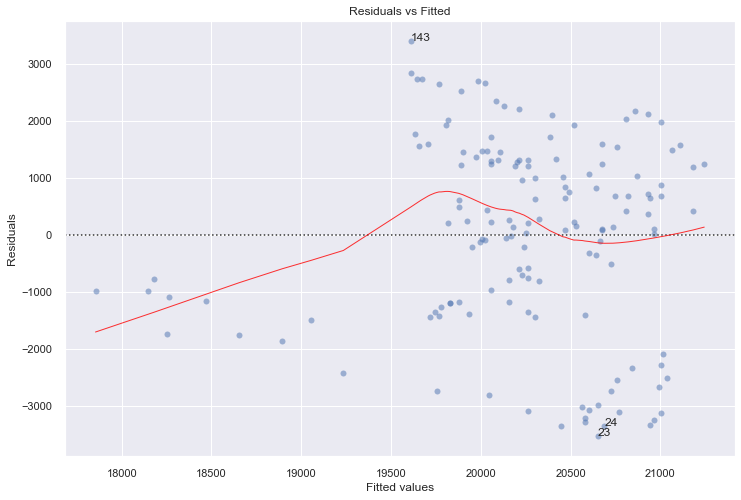

In [1048]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'clothingval', data=train1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

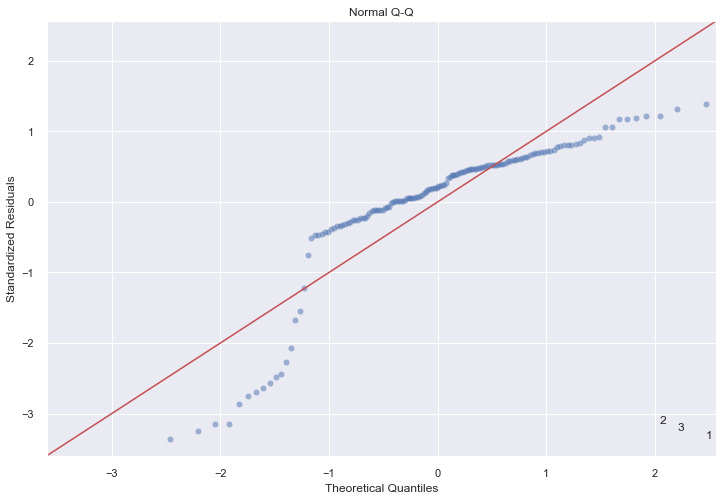

In [990]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));